# Instructions## Ronan Jasper G. Reponte

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.
3. 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from ucimlrepo import fetch_ucirepo
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
# Suppress the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 
  
# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
# Check for missing values
print(X.isnull().sum())
print(y.isnull().sum())

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64
Type_of_glass    0
dtype: int64


In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_dt_model = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_model.fit(X_train, y_train)

# Evaluate the model
y_pred_best = best_dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.7209302325581395
Confusion Matrix:
 [[11  2  0  0  0  1]
 [ 2  8  1  0  4  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.79      0.79        14
           2       0.73      0.53      0.62        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.33      1.00      0.50         2
           7       0.86      1.00      0.92         6

    accuracy                           0.72        43
   macro avg       0.73      0.78      0.72        43
weighted avg       0.76      0.72      0.72        43



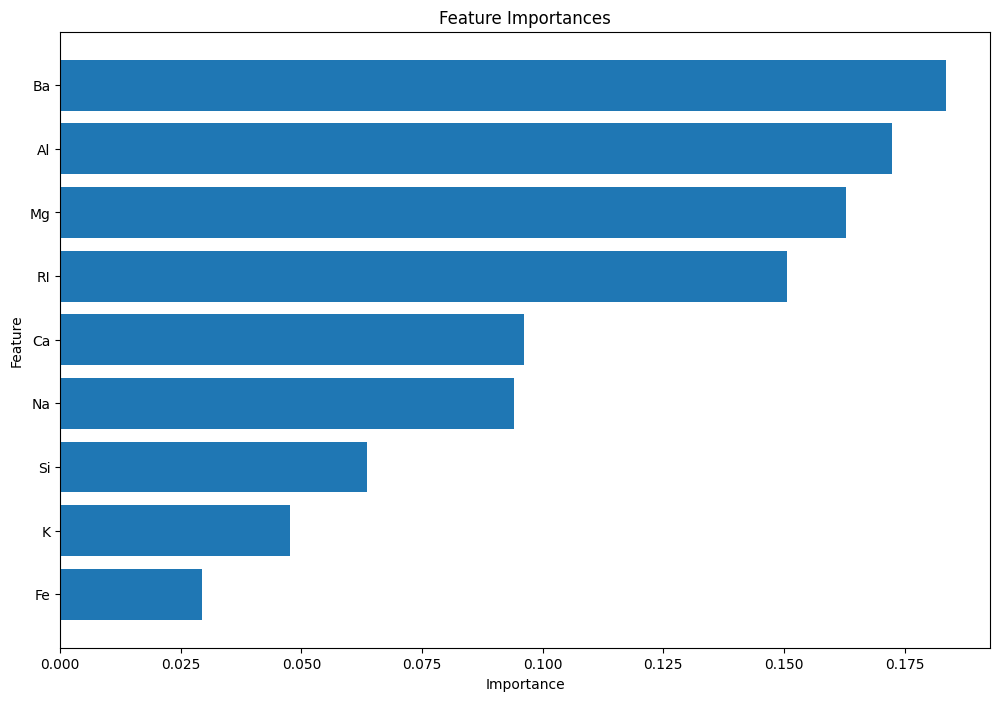

In [16]:
# Get feature importances
importances = best_dt_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

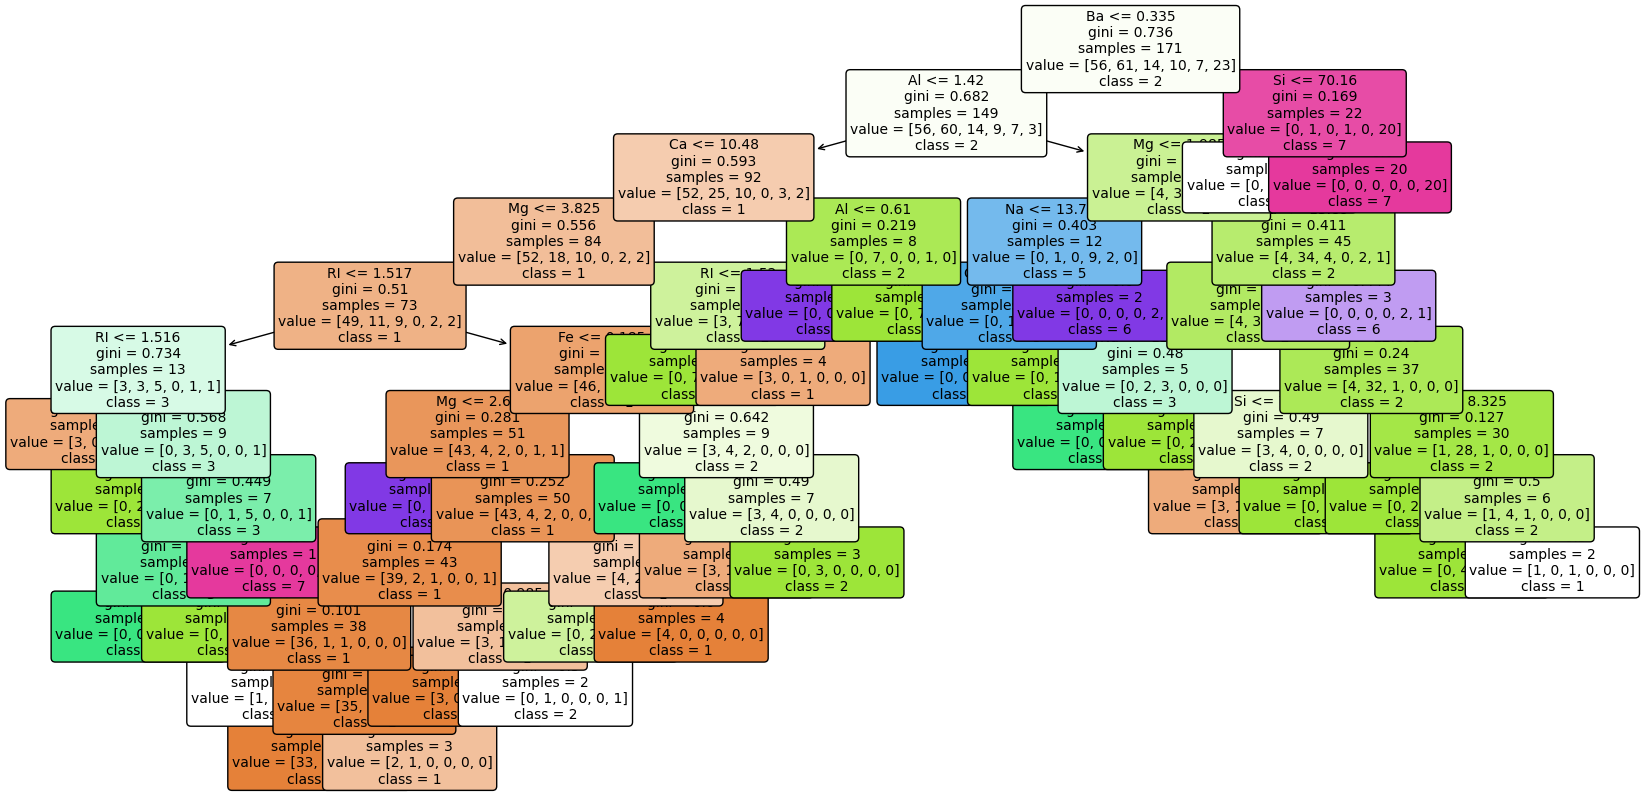

In [19]:
# Create the tree plot
plt.figure(figsize=(20,10))
plot_tree(best_dt_model, feature_names=X.columns, class_names=[str(i) for i in np.unique(y)], filled=True, rounded=True, fontsize=10)
plt.show()
